In [3]:
import pandas as pd

# DataFrame  
Is the basic data structure

In [4]:
df = pd.DataFrame([[1,2,3],[3,4,5],[6,7,8]], columns=["A","B","C"]) # creating a data frame

In [5]:
df.head()

,A,B,C
0,1,2,3
1,3,4,5
2,6,7,8


In [6]:
# df.index.tolist()
# df.columns
df = pd.DataFrame([[1,2,3],[3,4,5],[6,7,8]], columns=["A","B","C"], index=["x","xx","xxx"]) # change index
df

,A,B,C
x,1,2,3
xx,3,4,5
xxx,6,7,8


In [7]:
# to see info ab the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, x to xxx
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       3 non-null      int64
 1   B       3 non-null      int64
 2   C       3 non-null      int64
dtypes: int64(3)
memory usage: 96.0+ bytes


In [8]:
# statistical summary
df.describe()

,A,B,C
count,3.000000,3.000000,3.000000
mean,3.333333,4.333333,5.333333
std,2.516611,2.516611,2.516611
min,1.000000,2.000000,3.000000
25%,2.000000,3.000000,4.000000
50%,3.000000,4.000000,5.000000
75%,4.500000,5.500000,6.500000
max,6.000000,7.000000,8.000000


In [9]:
df.shape

(3, 3)

In [10]:
df["A"] # to project on a column

x      1
xx     3
xxx    6
Name: A, dtype: int64

# Reading files


In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/warmup-data/coffee.csv")

In [12]:
df.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35


In [13]:
display(df)

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


In [14]:
df.sample(5, random_state = 42) # randomly sample 5 units

,Day,Coffee Type,Units Sold
9,Friday,Latte,35
11,Saturday,Latte,35
0,Monday,Espresso,25
12,Sunday,Espresso,45
5,Wednesday,Latte,25


# Accessing data

In [15]:
# df.loc[ [rows], [columns]]

# df.iloc() only uses index values

df.loc[1, "Units Sold"] = 10  # to change some value
df

# df.at[0, "Units Sold"]  # optimized way to get a value

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,10
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


In [16]:
# SORT VALUES
df.sort_values("Units Sold", ascending=False)

,Day,Coffee Type,Units Sold
8,Friday,Espresso,45
10,Saturday,Espresso,45
12,Sunday,Espresso,45
6,Thursday,Espresso,40
4,Wednesday,Espresso,35
9,Friday,Latte,35
11,Saturday,Latte,35
13,Sunday,Latte,35
2,Tuesday,Espresso,30
7,Thursday,Latte,30


In [17]:
# SORTING ON MULTIPLE CONDITIONS
df.sort_values(["Units Sold", "Coffee Type"], ascending=False)
df.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,10
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35


In [18]:
# ITERATING OVER ROWS
for index, row in df.iterrows():
    pass

# Filtering data

In [19]:
# SELECTRING ROWS ON CONDITION
df.loc[df["colname"] > 15]

# MULTIPLE CONDITIONS
df.loc[(df["colname"]>15) & (df["colname2"] == 100)]

# NAMES STARTING WITH A LETTER
df[df["name"].str.contains("K", case=False)]

# SELECT ROWS WHO TAKE VALUE IN SOME SET/LIST
df[df["name"].isin(["Leonard","Egnald", "Giorgio"], case=False)]


KeyError: 'colname'

In [ ]:
# QUERY FUNCTIONS - a way to make filtering more readable
df.query('column == value and condition 2 or condition 3')

# Adding / removing columns

In [ ]:
import numpy as np

coffee["price"] = np.where(coffee["type"]==espresso, 3, 4)
# set coffee price 3 if it's espresso, 4 otherwise

In [ ]:
# REMOVING COLUMNS
coffee.drop(columns=["col1", "col2"])
# this does not actually modify the real df, it just returns a modified copy of the df

# MODIFYING THE TRUE DATA FRAME
coffee.drop(columns=["col1", "col2"], inplace=True)
# or
coffee = coffee.drop(columns=["col1", "col2"], inplace=True)



In [ ]:
# ADDING A NEW COLUMN
# Assume you want to add a new column where every entry is a product of the entries in those 2 columns
df["new_col"] = df["col1"] * df["col2"]

# RENAMING COLUMNS
coffee.rename(columns={"old_val":"new_val"}, inplace=True)


In [20]:
# SAVING DATA AS CSV
df.to_csv("path", index=False)

# SELECTING ROWS WITH LAMBDA FUNCTIONS
df["col"].apply(lambda x: "short" if x < 170 else ("average" if x>170 else "Tall"))

# or you define a function
def categorize(row):
    pass

# df["col"].apply(categorize, axis=1)

KeyError: 'col'

# Merging & concatenating data

In [ ]:
pd.merge(df1, df2, left_on = "col", right_on = "col", how="inner")

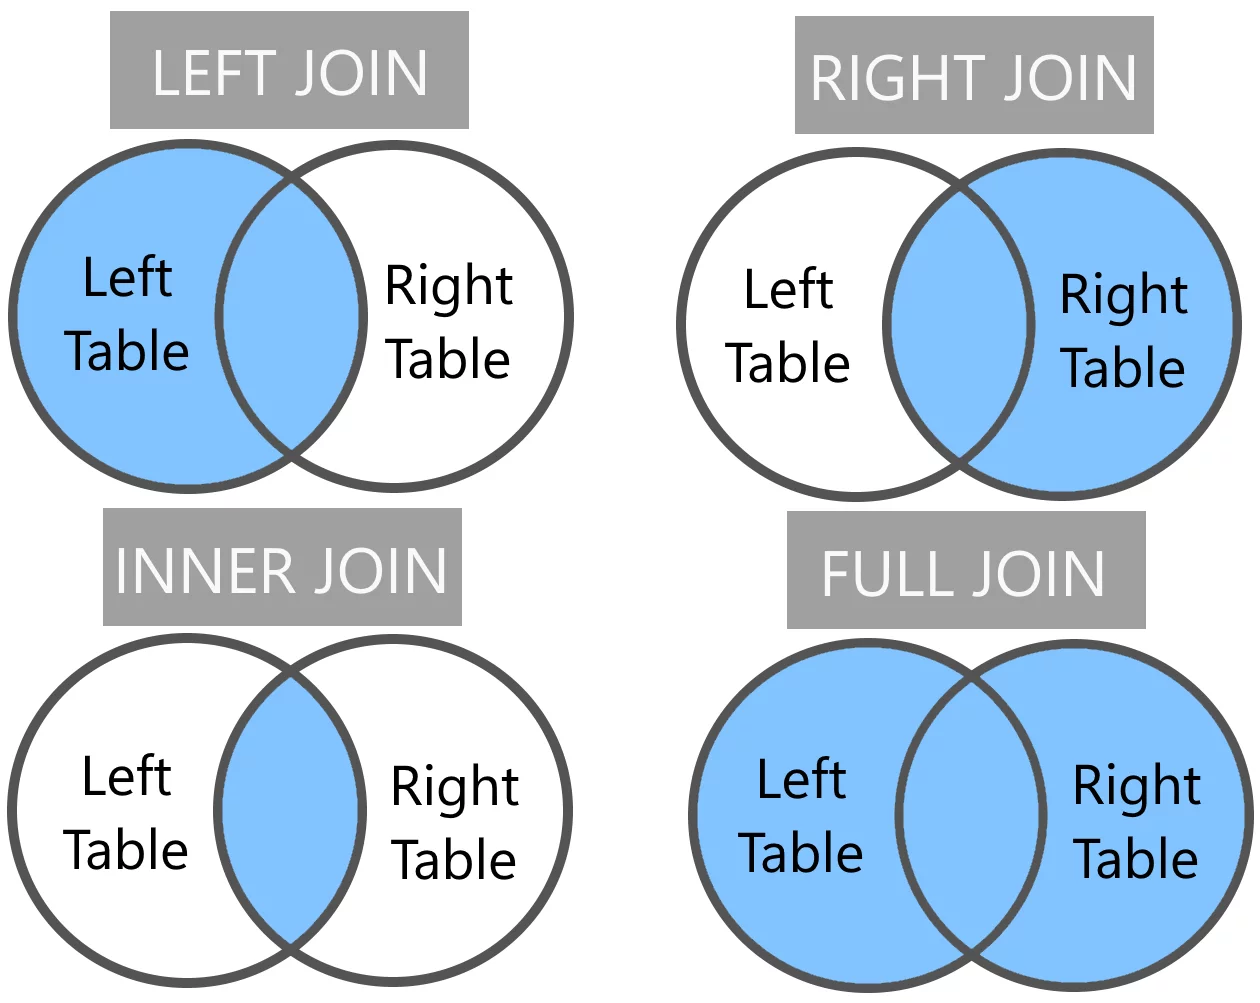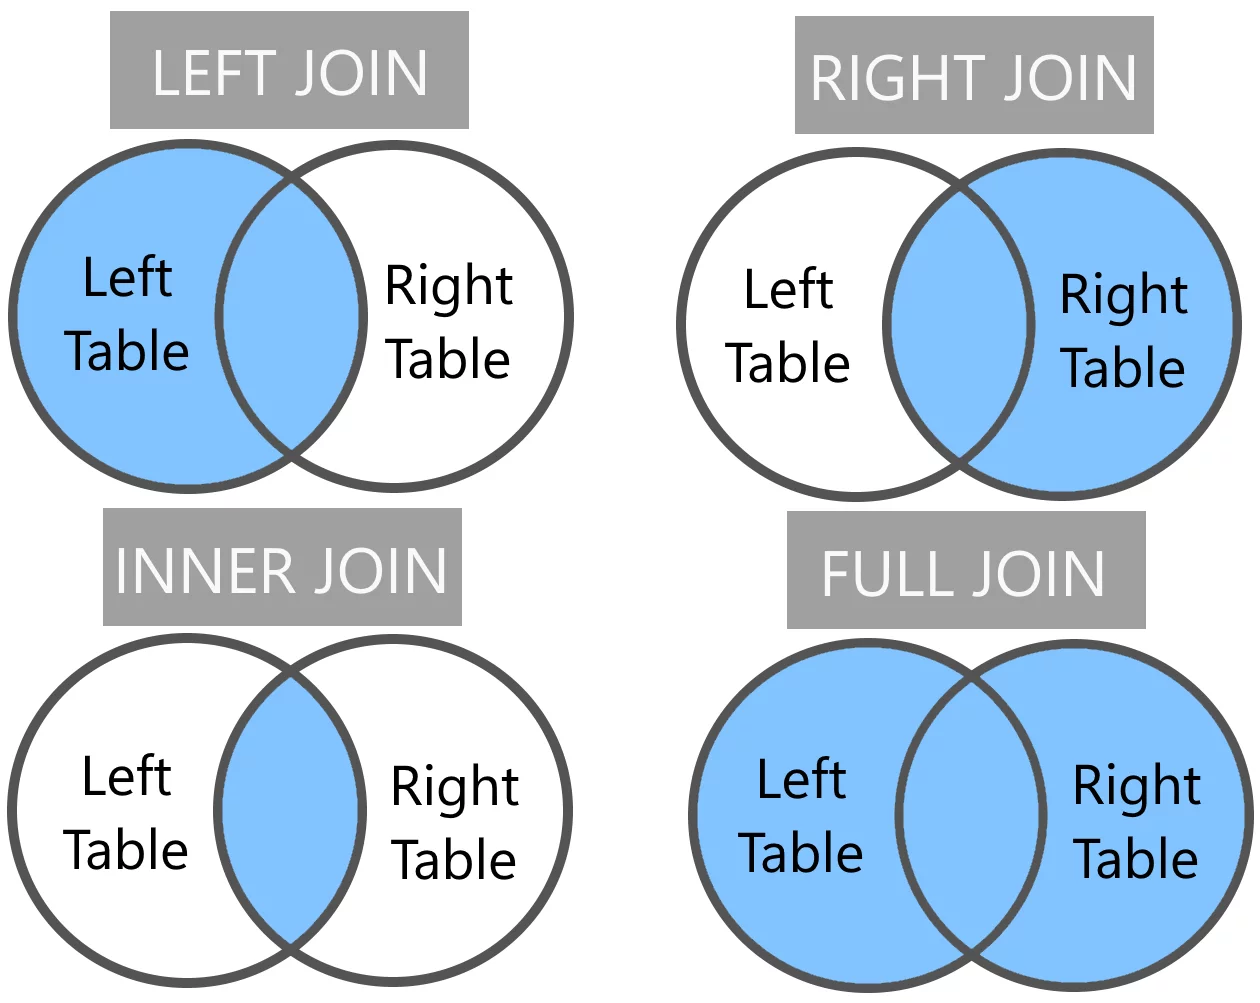

# Handling null values

In [ ]:
df.isna().sum() # shows how many NA values per column

df.fillna(0) # puts 0 in every NA value
df.fillna(df["col1"].mean()) # puts the mean of the column in a NA value
df["col"].interpolate() # fills in value looking at data patters and neighbors
coffee.dropna() #drops all NA consisting rows 
cofee.dropna(subset=["some_column"]) # drops rows only if NA found in some_column
df[df.notna()] # gets rows that do not have NA values

# Aggregating data

In [53]:
df["Day"].value_counts() # gives frequencies of each value

Day
Monday       2
Tuesday      2
Wednesday    2
Thursday     2
Friday       2
Saturday     2
Sunday       2
Name: count, dtype: int64

In [51]:
# grouping
df["Price"] = 1.1
df.groupby(["Coffee Type"]).agg({"Units Sold":"sum", "Price":"mean"})

,Units Sold,Price
Coffee Type,,
Espresso,265,1.1
Latte,190,1.1


In [47]:
# pivoting
pivot = df.pivot(columns = "Coffee Type", index = "Day", values = "Units Sold")
pivot.head()

Coffee Type,Espresso,Latte
Day,,
Friday,45,35
Monday,25,10
Saturday,45,35
Sunday,45,35
Thursday,40,30


In [48]:
pivot.sum(axis=1)

Day
Friday       80
Monday       35
Saturday     80
Sunday       80
Thursday     70
Tuesday      50
Wednesday    60
dtype: int64